In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [2]:
# read dataset
df = pd.read_csv('../data/sgjobdata.csv.xz')
df.head()

,categories,employmentTypes,metadata_expiryDate,metadata_isPostedOnBehalf,metadata_jobPostId,metadata_newPostingDate,metadata_originalPostingDate,metadata_repostCount,metadata_totalNumberJobApplication,metadata_totalNumberOfView,...,occupationId,positionLevels,postedCompany_name,salary_maximum,salary_minimum,salary_type,status_id,status_jobStatus,title,average_salary
0,"[{""id"":13,""category"":""Environment / Health""},{...",Permanent,2023-05-08,False,MCF-2023-0252866,2023-04-08,2023-03-30,2,5,151,...,NaN,Executive,WORKSTONE PTE. LTD.,2800,2000,Monthly,0,Closed,Food Technologist - Clementi | Entry Level | U...,2400.0
1,"[{""id"":21,""category"":""Information Technology""}]",Permanent,2023-05-08,False,MCF-2023-0273977,2023-04-08,2023-04-08,0,0,55,...,NaN,Executive,TRUST RECRUIT PTE. LTD.,5500,4000,Monthly,0,Closed,"Software Engineer (Fab Support) (Java, CIM, Up...",4750.0
2,"[{""id"":33,""category"":""Repair and Maintenance""}]",Full Time,2023-04-22,False,MCF-2023-0273994,2023-04-08,2023-04-08,0,7,99,...,NaN,Senior Executive,PU TIEN SERVICES PTE. LTD.,4600,3800,Monthly,0,Closed,Senior Technician,4200.0
3,"[{""id"":21,""category"":""Information Technology""}]",Permanent,2023-05-08,False,MCF-2023-0273991,2023-04-08,2023-04-08,0,6,113,...,NaN,Senior Executive,TRUST RECRUIT PTE. LTD.,10000,5000,Monthly,0,Closed,"Senior .NET Developer (.NET Core, MVC, MVVC, S...",7500.0
4,"[{""id"":2,""category"":""Admin / Secretarial""}]",Full Time,2023-05-08,False,MCF-2023-0273976,2023-04-08,2023-04-08,0,3,99,...,NaN,Non-executive,EATZ CATERING SERVICES PTE. LTD.,3400,2400,Monthly,0,Closed,Sales / Admin Cordinator,2900.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048585 entries, 0 to 1048584
Data columns (total 22 columns):
 #   Column                              Non-Null Count    Dtype  
---  ------                              --------------    -----  
 0   categories                          1044597 non-null  object 
 1   employmentTypes                     1044597 non-null  object 
 2   metadata_expiryDate                 1044597 non-null  object 
 3   metadata_isPostedOnBehalf           1048585 non-null  bool   
 4   metadata_jobPostId                  1044597 non-null  object 
 5   metadata_newPostingDate             1044597 non-null  object 
 6   metadata_originalPostingDate        1044597 non-null  object 
 7   metadata_repostCount                1048585 non-null  int64  
 8   metadata_totalNumberJobApplication  1048585 non-null  int64  
 9   metadata_totalNumberOfView          1048585 non-null  int64  
 10  minimumYearsExperience              1048585 non-null  int64  
 11  numberOfVac

In [4]:
def explode_categories(df, col="categories"):
    out = df.copy()

    out[col] = (
        out[col]
        .dropna()
        .map(lambda x: json.loads(x) if isinstance(x, str) else x)
    )

    out = out.explode(col, ignore_index=True)

    out["category_id"] = out[col].map(lambda d: d.get("id") if isinstance(d, dict) else None)
    out["category"]    = out[col].map(lambda d: d.get("category") if isinstance(d, dict) else None)

    return out.drop(columns=[col])

df_exploded = explode_categories(df)
df_exploded.head()

,employmentTypes,metadata_expiryDate,metadata_isPostedOnBehalf,metadata_jobPostId,metadata_newPostingDate,metadata_originalPostingDate,metadata_repostCount,metadata_totalNumberJobApplication,metadata_totalNumberOfView,minimumYearsExperience,...,postedCompany_name,salary_maximum,salary_minimum,salary_type,status_id,status_jobStatus,title,average_salary,category_id,category
0,Permanent,2023-05-08,False,MCF-2023-0252866,2023-04-08,2023-03-30,2,5,151,0,...,WORKSTONE PTE. LTD.,2800,2000,Monthly,0,Closed,Food Technologist - Clementi | Entry Level | U...,2400.0,13.0,Environment / Health
1,Permanent,2023-05-08,False,MCF-2023-0252866,2023-04-08,2023-03-30,2,5,151,0,...,WORKSTONE PTE. LTD.,2800,2000,Monthly,0,Closed,Food Technologist - Clementi | Entry Level | U...,2400.0,25.0,Manufacturing
2,Permanent,2023-05-08,False,MCF-2023-0252866,2023-04-08,2023-03-30,2,5,151,0,...,WORKSTONE PTE. LTD.,2800,2000,Monthly,0,Closed,Food Technologist - Clementi | Entry Level | U...,2400.0,36.0,Sciences / Laboratory / R&D
3,Permanent,2023-05-08,False,MCF-2023-0273977,2023-04-08,2023-04-08,0,0,55,2,...,TRUST RECRUIT PTE. LTD.,5500,4000,Monthly,0,Closed,"Software Engineer (Fab Support) (Java, CIM, Up...",4750.0,21.0,Information Technology
4,Full Time,2023-04-22,False,MCF-2023-0273994,2023-04-08,2023-04-08,0,7,99,3,...,PU TIEN SERVICES PTE. LTD.,4600,3800,Monthly,0,Closed,Senior Technician,4200.0,33.0,Repair and Maintenance


In [6]:
# if company name contains 'kpmg', show list of such rows
df_exploded[df_exploded['postedCompany_name'].str.contains('kpmg', case=False, na=False)].sort_values('metadata_originalPostingDate', ascending=False)


,employmentTypes,metadata_expiryDate,metadata_isPostedOnBehalf,metadata_jobPostId,metadata_newPostingDate,metadata_originalPostingDate,metadata_repostCount,metadata_totalNumberJobApplication,metadata_totalNumberOfView,minimumYearsExperience,...,postedCompany_name,salary_maximum,salary_minimum,salary_type,status_id,status_jobStatus,title,average_salary,category_id,category
1769536,Full Time,2024-06-28,False,MCF-2024-0778628,2024-05-29,2024-05-29,0,1,7,1,...,KPMG SERVICES PTE. LTD.,5000,3000,Monthly,0,Open,"Personal Tax & Global Mobility Services, Assoc...",4000.0,1.0,Accounting / Auditing / Taxation
1768215,Permanent,2024-06-27,False,MCF-2024-0772530,2024-05-28,2024-05-28,0,1,8,8,...,KPMG SERVICES PTE. LTD.,15500,8000,Monthly,0,Open,"Indirect Tax, Manager/Senior Manager",11750.0,1.0,Accounting / Auditing / Taxation
1763261,Full Time,2024-06-27,False,MCF-2024-0771384,2024-05-28,2024-05-28,0,0,1,1,...,KPMG SERVICES PTE. LTD.,5000,3000,Monthly,0,Open,"Indirect Tax, Associate",4000.0,1.0,Accounting / Auditing / Taxation
1767911,Permanent,2024-06-27,False,MCF-2024-0772873,2024-05-28,2024-05-28,0,1,11,6,...,KPMG SERVICES PTE. LTD.,12000,6500,Monthly,0,Open,"Corporate Tax Planning & Compliance, Assistant...",9250.0,1.0,Accounting / Auditing / Taxation
1767937,Permanent,2024-06-27,False,MCF-2024-0772888,2024-05-28,2024-05-28,0,1,13,10,...,KPMG SERVICES PTE. LTD.,15500,8000,Monthly,0,Open,Corporate Tax Planning and Compliance - Manage...,11750.0,1.0,Accounting / Auditing / Taxation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91654,Permanent,2023-06-22,False,MCF-2023-0054535,2023-05-23,2023-01-19,1,10,150,10,...,KPMG SERVICES PTE. LTD.,15000,7500,Monthly,0,Closed,"Risk Consulting, Digital Trust, Associate Dire...",11250.0,21.0,Information Technology
91652,Permanent,2023-06-22,False,MCF-2023-0054535,2023-05-23,2023-01-19,1,10,150,10,...,KPMG SERVICES PTE. LTD.,15000,7500,Monthly,0,Closed,"Risk Consulting, Digital Trust, Associate Dire...",11250.0,1.0,Accounting / Auditing / Taxation
255377,Full Time,2023-07-28,False,MCF-2023-0024812,2023-06-28,2023-01-10,1,33,307,7,...,KPMG SERVICES PTE. LTD.,18000,9000,Monthly,0,Re-open,"ESG Hub - Associate Director, ESG Alliances",13500.0,26.0,Marketing / Public Relations
255378,Full Time,2023-07-28,False,MCF-2023-0024812,2023-06-28,2023-01-10,1,33,307,7,...,KPMG SERVICES PTE. LTD.,18000,9000,Monthly,0,Re-open,"ESG Hub - Associate Director, ESG Alliances",13500.0,29.0,Professional Services


In [7]:
df_exploded.category.value_counts()

category
Information Technology               140866
Engineering                          136372
Admin / Secretarial                  117854
Customer Service                     111785
Others                               106101
Sales / Retail                       105067
Building and Construction             84034
Accounting / Auditing / Taxation      78648
F&B                                   73731
Logistics / Supply Chain              69193
Banking and Finance                   62000
Manufacturing                         56437
Human Resources                       53465
Marketing / Public Relations          53442
Healthcare / Pharmaceutical           52741
Education and Training                44877
Consulting                            38961
General Management                    35397
General Work                          30140
Hospitality                           25165
Repair and Maintenance                23791
Professional Services                 20221
Sciences / Laboratory /

In [9]:
df_exploded[df_exploded['category'] == 'Accounting / Auditing / Taxation'][['category','postedCompany_name','metadata_jobPostId','numberOfVacancies']] \
    .groupby('postedCompany_name').numberOfVacancies.sum().sort_values(ascending=False)

postedCompany_name
RECRUITPEDIA PTE. LTD.                        50169
THE SUPREME HR ADVISORY PTE. LTD.              7295
ANRADUS PTE. LTD.                              6821
RECRUIT EXPRESS PTE LTD                        5647
APBA TG HUMAN RESOURCE PTE. LTD.               3357
                                              ...  
COSCO SHIPPING (SOUTH EAST ASIA) PTE. LTD.        1
NICHE RECRUITMENT CONSULTANTS PTE. LTD.           1
NICHE COURIER SERVICES PTE. LTD.                  1
NICAE (SINGAPORE) PTE LTD                         1
Zu-Lin Temple Association                         1
Name: numberOfVacancies, Length: 11913, dtype: int64

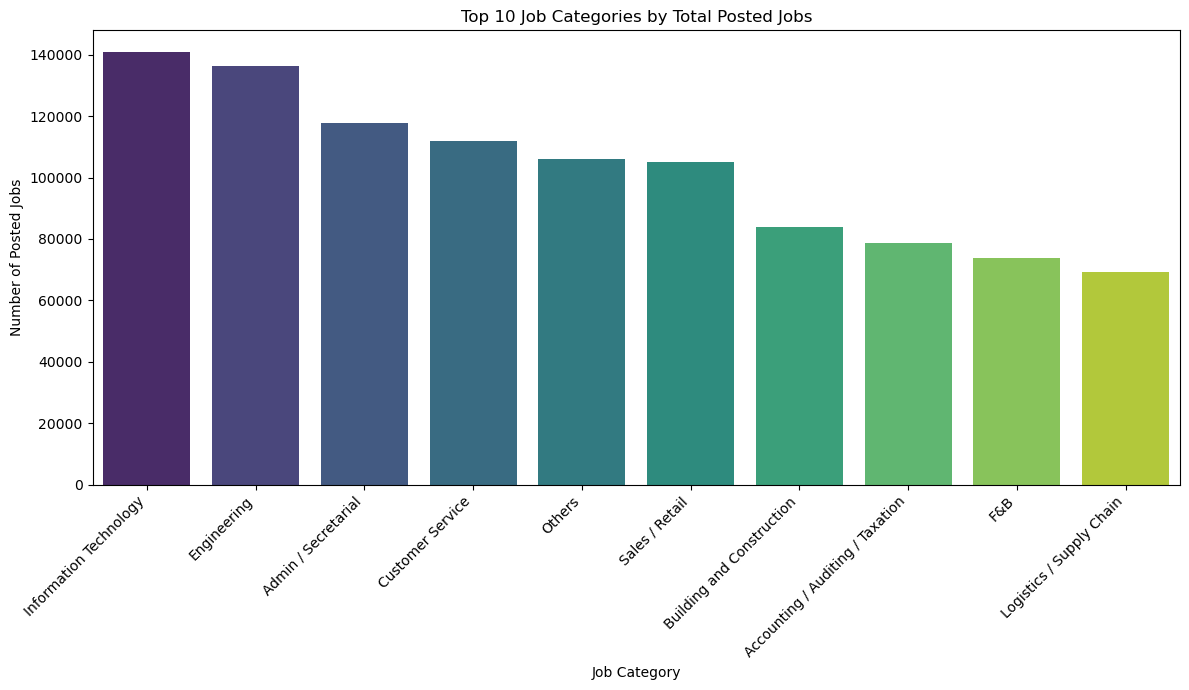

In [6]:
# Ensure 'category_name' is not null and then count occurrences
category_counts = df_exploded['category'].dropna().value_counts()

# Get the top 10 categories
top_10_categories = category_counts.head(10)

# Create the bar chart
plt.figure(figsize=(12, 7))
sns.barplot(x=top_10_categories.index, y=top_10_categories.values, palette='viridis', hue=top_10_categories.index, legend=False)
plt.title('Top 10 Job Categories by Total Posted Jobs')
plt.xlabel('Job Category')
plt.ylabel('Number of Posted Jobs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# Filter for Information Technology category
it_jobs = df_exploded[df_exploded['category'] == 'Information Technology']

# Group by company and count jobs
company_counts = it_jobs['postedCompany_name'].value_counts()

# Get top 10 companies
top_10_companies = company_counts.head(10)

# Create the bar chart
plt.figure(figsize=(12, 7))
sns.barplot(x=top_10_companies.index, y=top_10_companies.values, palette='viridis', hue=top_10_companies.index, legend=False)
plt.title('Top 10 Companies by Number of Information Technology Jobs Posted')
plt.xlabel('Company Name')
plt.ylabel('Number of Jobs Posted')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()